In [1]:
!pip install tensorflow
!pip install keras

In [17]:
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

import graphviz
from sklearn import tree

In [4]:
#.1: Carregar o conjunto de dados MNIST e pré-processar os dados:

# Dividir o dataset em treinamento e teste
mds = mnist.load_data()
(x_train, y_train), (x_test, y_test) = mds

#Redimensionamento:
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [ ]:
#Ajustando os hiperparâmetros para:

#max_depth: Define a profundidade máxima de cada árvore. Valores maiores permitem modelos mais complexos, mas podem levar ao overfitting.

#learning_rate: Controla a taxa de aprendizado. Valores menores levam a modelos mais conservadores, enquanto valores maiores podem levar a convergência mais rápida, mas com maior risco de overfitting.

#n_estimators: Número de árvores no ensemble. Um número maior de árvores geralmente melhora o desempenho, mas pode aumentar o tempo de treinamento.

#subsample: Fração de observações utilizadas para treinar cada árvore. Valores menores podem ajudar a prevenir overfitting.

#colsample_bytree: Fração de features utilizadas para cada árvore. Valores menores podem ajudar a prevenir overfitting.

#gamma: Valor mínimo de redução de perda necessária para fazer uma divisão. Valores maiores fazem com que o modelo seja mais conservador.

In [ ]:
#Métricas de Avaliação:

#Acurácia: Representa a proporção total de exemplos classificados corretamente.
#(É uma métrica simples, mas pode ser enganosa em datasets desbalanceados).

#Precisão: Mede a proporção de exemplos classificados como positivos que realmente são positivos.
#(É útil quando o custo de falsos positivos é alto).

#Recall: Mede a proporção de exemplos positivos que foram corretamente classificados como positivos.
#(É útil quando o custo de falsos negativos é alto).

#F1-Score: É a média harmônica entre precisão e recall.
#(É uma boa medida quando se deseja um bom equilíbrio entre precisão e recall).

Treinando um modelo de árvore simples: DecisionTreeClassifier (32s)

In [10]:
modeloDTC = DecisionTreeClassifier(random_state=42)
modeloDTC.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
#Precisão do modelo: DecisionTreeClassifier
print("Precisão:", modeloDTC.score(x_test, y_test))

#Acurácia:

y_pred1 = modeloDTC.predict(x_test)

accuracy = accuracy_score(y_test, y_pred1)
print("Acurácia:", accuracy)

Precisão: 0.8755
Acurácia: 0.8755


In [12]:
# Ajustando os parâmetros para retreino >> 6s de execução

modeloDTC2 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=42)
modeloDTC2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=42)

In [13]:
#Precisão do modelo: DecisionTreeClassifier
print("Precisão:", modeloDTC2.score(x_test, y_test))

#Acurácia:

y_pred2 = modeloDTC2.predict(x_test)

accuracy = accuracy_score(y_test, y_pred2)
print("Acurácia:", accuracy)

Precisão: 0.6747
Acurácia: 0.6747


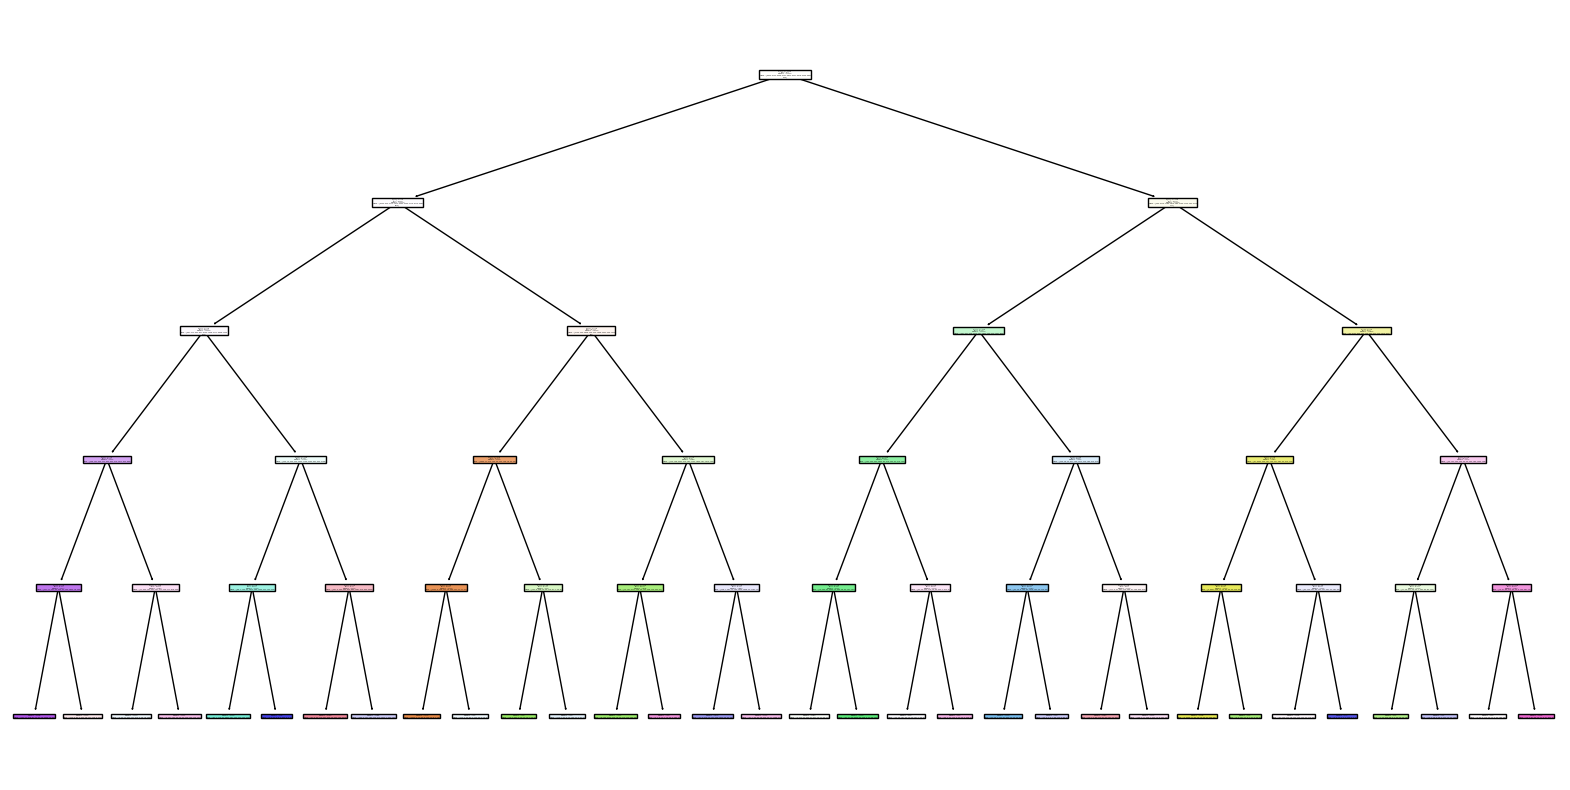

In [16]:
# Visualizando a Árvore de Decisão:

plt.figure(figsize=(20,10))
plot_tree(modeloDTC2, filled=True)

plt.show()

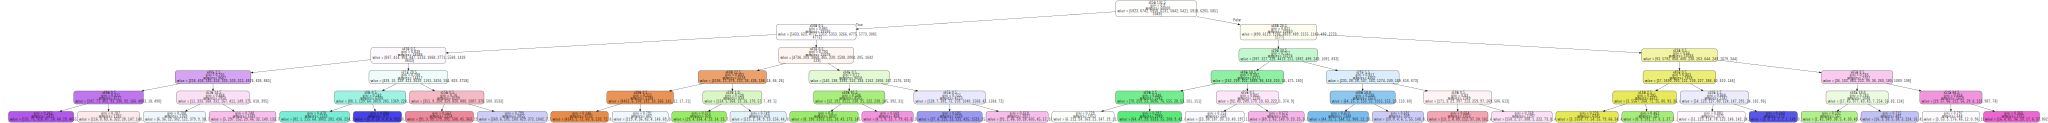

In [18]:
# Visualizar a árvore de decisão treinada utilizando o Graphviz.

# Exporta a árvore de decisão para um arquivo .dot
dot_data = tree.export_graphviz(modeloDTC2, out_file=None,
                         filled=True, rounded=True,
                         special_characters=True)

# Cria o gráfico a partir do arquivo .dot
graph = graphviz.Source(dot_data)

# Renderiza o gráfico como um arquivo PDF (ou outro formato de sua preferência)
graph.render("decision_tree")

# Exibe o gráfico no Colab
graph

Treinando um modelo de árvore simples: XGBoost (aprox. 10min)

In [5]:
modeloXGB = xgb.XGBClassifier(n_estimators=100)

# Treinar a Decision Tree com XGBoost
modeloXGB.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:47:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [9]:
#Precisão do modelo: XGBoost
print("Precisão:", modeloXGB.score(x_test, y_test))

#Acurácia:

y_pred = modeloXGB.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Precisão: 0.9795
Acurácia: 0.9795
